```shell
cd ~/link/res_publish/run/plot
conda activate
jupyter nbconvert plot_LC.ipynb --to python

conda activate publish
nohup python plot_LC.py True png Seurat > /dev/null &
nohup python plot_LC.py True png SAMap > /dev/null &
nohup python plot_LC.py True png came  > /dev/null &
nohup python plot_LC.py True png csMAHN  > /dev/null &

rm plot_LC.py

conda activate
echo 'finish'

jobs

```

In [1]:
import sys
from pathlib import Path
p_root = Path('.').absolute().parent
None if str(p_root) in sys.path else sys.path.append(str(p_root))

In [2]:
from func import *
item = 'LC'
fig_format = 'png'
show_legend = False


model = ''
if sys.argv[1] == 'True':
    fig_format = sys.argv[2]
    model = sys.argv[3]
assert model in 'Seurat,came,csMAHN,SAMap'.split(','),'[Error] Invalid modle "{}"'.format(model)


p_plot_item = p_plot.joinpath(item)
p_plot_item.mkdir(exist_ok=True,parents=True)
df_para = pd.read_csv(p_cache.joinpath(
    'parameter_{}.csv'.format(item)
))
df_para['path_ref'] = df_para['path_ref'].apply(
    lambda x: p_cache.joinpath(x))
df_para['path_que'] = df_para['path_que'].apply(
    lambda x: p_cache.joinpath(x))

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-04-01 16:53:53.165339: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.



-------------------------help-------------------------
> parameter
    p_root	[name] res_publish
        p_run, p_plot, p_res, p_cache
    p_df_varmap
    map_sp_reverse
    rng
> run
    run_cross_species_models
    h5ad_to_mtx
    load_adata
    get_path_varmap
    find_path_from_para
    load_normalized_adata

> res
    get_test_result_df
    get_res_obs
    show_umap

> plot
    get_color_map
    show_color_map
    show_color
    plot_umap
    savefig



# get res info

In [3]:
df = get_test_result_df(p_res)
df = df.query("tissue == 'LC'")

df['time_tag'] = df['name'].str.extract(
    ';(\\d{6}-\\d{4})$', expand=False).fillna('')
df = df[df['time_tag'].str.len() == 0]
df = df.drop(columns=['time_tag'])

df['tag'] = df['name_ref'].apply(lambda x: x[3:])

df['epochs'] = df['resdir_tag'].str.extract(
    "epochs=(\\d+)", expand=False).fillna('')
df['epochs'] = df['epochs'].mask(
    df['tag'] != 'all', '').mask(
        df['model'] == 'Seurat', '')
df = df.query("not (tag == 'all' & epochs == '500')")
_temp = df.apply(
    lambda row: '{model};{tag}'.format(
        **row), axis=1)
assert _temp.is_unique, '[isnot unique]'
df.index = _temp
del _temp

df['F1-score'] = df.apply(get_res_stat,
                          key='F1-score',
                          q="dataset_type == 'que'",
                          axis=1).mul(100).round(2)
df['Accuracy'] = df.apply(
    get_res_stat,
    key='Accuracy',
    q="dataset_type == 'que'",
    axis=1).mul(100).round(2)

df


[extract]
^(?P<tissue>.+)_(?P<sp_ref>.+)-corss-(?P<sp_que>.+);(?P<model>came|csMAHN|Seurat|SAMap);(?P<name_ref>[\w-]+)-map-(?P<name_que>[[\w-]+);?(?P<resdir_tag>.+)?$


/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/pandas/core/strings/accessor.py:2738: FutureWarning: Possible nested set at position 127
  regex = re.compile(pat, flags=flags)


,dir,name,tissue,sp_ref,sp_que,model,name_ref,name_que,resdir_tag,tag,epochs,F1-score,Accuracy
SAMap;Neu,/public/workspace/licanchengup/download/res_pu...,LC_h-corss-m;SAMap;LChNeu-map-LCmNeu;is_1v1=False,LC,h,m,SAMap,LChNeu,LCmNeu,is_1v1=False,Neu,,56.26,57.61
SAMap;DCs,/public/workspace/licanchengup/download/res_pu...,LC_h-corss-m;SAMap;LChDCs-map-LCmDCs;is_1v1=False,LC,h,m,SAMap,LChDCs,LCmDCs,is_1v1=False,DCs,,68.25,65.33
came;all,/public/workspace/licanchengup/download/res_pu...,LC_h-corss-m;came;LChall-map-LCmall;epochs=300...,LC,h,m,came,LChall,LCmall,epochs=300;is_1v1=False,all,300,91.84,92.21
Seurat;Mono,/public/workspace/licanchengup/download/res_pu...,LC_h-corss-m;Seurat;LChMono-map-LCmMono;is_1v1...,LC,h,m,Seurat,LChMono,LCmMono,is_1v1=True,Mono,,9.03,21.01
Seurat;DCs,/public/workspace/licanchengup/download/res_pu...,LC_h-corss-m;Seurat;LChDCs-map-LCmDCs;is_1v1=True,LC,h,m,Seurat,LChDCs,LCmDCs,is_1v1=True,DCs,,68.76,70.59
csMAHN;DCs,/public/workspace/licanchengup/download/res_pu...,LC_h-corss-m;csMAHN;LChDCs-map-LCmDCs;epochs=5...,LC,h,m,csMAHN,LChDCs,LCmDCs,epochs=500;is_1v1=False,DCs,,74.22,73.22
Seurat;Neu,/public/workspace/licanchengup/download/res_pu...,LC_h-corss-m;Seurat;LChNeu-map-LCmNeu;is_1v1=True,LC,h,m,Seurat,LChNeu,LCmNeu,is_1v1=True,Neu,,43.64,46.64
csMAHN;all,/public/workspace/licanchengup/download/res_pu...,LC_h-corss-m;csMAHN;LChall-map-LCmall;epochs=3...,LC,h,m,csMAHN,LChall,LCmall,epochs=300;is_1v1=False,all,300,90.42,89.62
came;Neu,/public/workspace/licanchengup/download/res_pu...,LC_h-corss-m;came;LChNeu-map-LCmNeu;epochs=500...,LC,h,m,came,LChNeu,LCmNeu,epochs=500;is_1v1=False,Neu,,12.24,20.23
came;Mono,/public/workspace/licanchengup/download/res_pu...,LC_h-corss-m;came;LChMono-map-LCmMono;epochs=5...,LC,h,m,came,LChMono,LCmMono,epochs=500;is_1v1=False,Mono,,14.82,24.38


In [4]:
df = df.sort_values('tag,model,epochs'.split(','))
df.loc[:, 'tag,model,epochs,Accuracy,F1-score'.split(',')]

,tag,model,epochs,Accuracy,F1-score
SAMap;DCs,DCs,SAMap,,65.33,68.25
Seurat;DCs,DCs,Seurat,,70.59,68.76
came;DCs,DCs,came,,69.97,67.30
csMAHN;DCs,DCs,csMAHN,,73.22,74.22
SAMap;Mono,Mono,SAMap,,70.56,68.66
Seurat;Mono,Mono,Seurat,,21.01,9.03
came;Mono,Mono,came,,24.38,14.82
csMAHN;Mono,Mono,csMAHN,,21.01,9.00
SAMap;Neu,Neu,SAMap,,57.61,56.26
Seurat;Neu,Neu,Seurat,,46.64,43.64


In [5]:
# for i, row in df.query("model == 'SAMap' & tag =='all'").iterrows():
#     print(row['name'])
#     display(pd.read_csv(row['dir'].joinpath('group_counts_unalign.csv')))
#     display(pd.read_csv(row['dir'].joinpath('group_counts.csv')))


LC_h-corss-m;SAMap;LChall-map-LCmall;is_1v1=False--------------------------


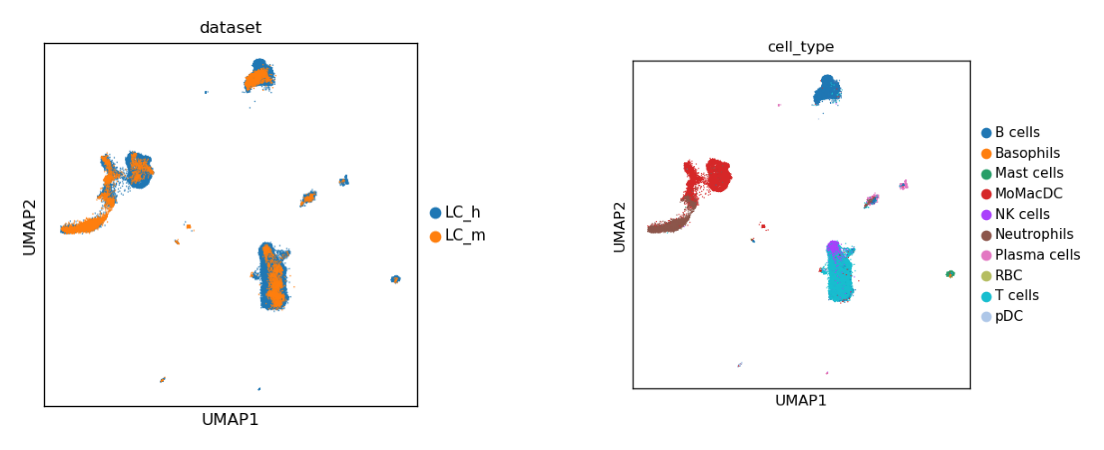

,LC_h,LC_m
cell_type,,
T cells,12776.0,1491.0
MoMacDC,9372.0,1768.0
B cells,5218.0,1874.0
Neutrophils,2728.0,3593.0
Plasma cells,2197.0,NaN
NK cells,1116.0,400.0
Mast cells,732.0,NaN
pDC,311.0,52.0
RBC,108.0,NaN


LC_h-corss-m;Seurat;LChall-map-LCmall;is_1v1=True--------------------------


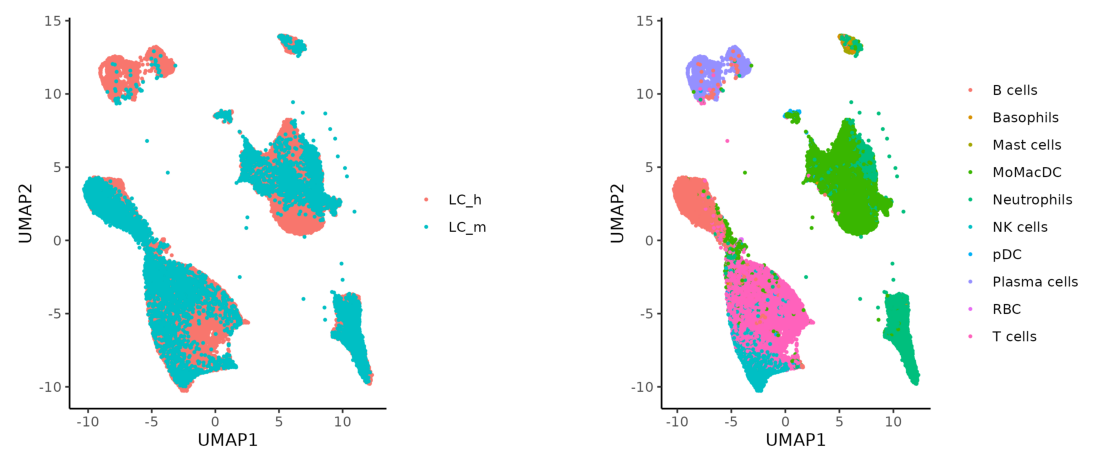

,LC_h,LC_m
cell_type,,
B cells,5218.0,1874.0
Mast cells,732.0,NaN
MoMacDC,9372.0,1768.0
NK cells,1116.0,400.0
Neutrophils,2728.0,3593.0
Plasma cells,2197.0,NaN
RBC,108.0,NaN
T cells,12776.0,1491.0
pDC,311.0,52.0


LC_h-corss-m;came;LChall-map-LCmall;epochs=300;is_1v1=False----------------


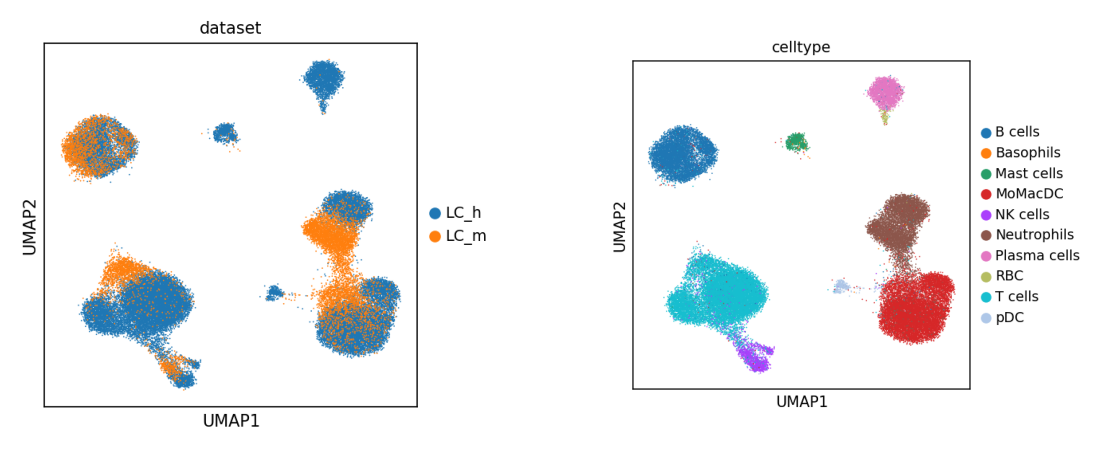

,LC_h,LC_m
cell_type,,
T cells,12776.0,1491.0
MoMacDC,9372.0,1768.0
B cells,5218.0,1874.0
Neutrophils,2728.0,3593.0
Plasma cells,2197.0,NaN
NK cells,1116.0,400.0
Mast cells,732.0,NaN
pDC,311.0,52.0
RBC,108.0,NaN


LC_h-corss-m;csMAHN;LChall-map-LCmall;epochs=300;is_1v1=False--------------


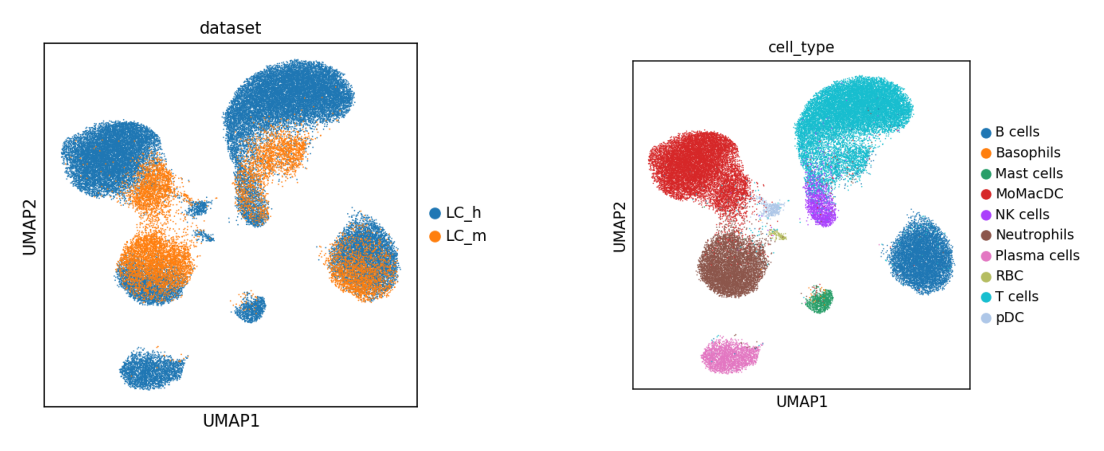

,LC_h,LC_m
cell_type,,
T cells,12776.0,1491.0
MoMacDC,9372.0,1768.0
B cells,5218.0,1874.0
Neutrophils,2728.0,3593.0
Plasma cells,2197.0,NaN
NK cells,1116.0,400.0
Mast cells,732.0,NaN
pDC,311.0,52.0
RBC,108.0,NaN


<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

In [6]:
for i, row in df.query("tag == 'all'").iterrows():
    show_umap(row)

# load_normalized_adata

In [7]:
# adata_ref = load_normalized_adata(find_path_from_para(df_para,row['name_ref']))
# adata_que = load_normalized_adata(find_path_from_para(df_para,row['name_que']))

# umap

## LCall

,UMAP1,UMAP2,cell_type,dataset,is_right,max_prob,pre_label,true_label,dataset_type,sp
cell_name,,,,,,,,,,
bcHTNA;h1tl_1,7.257941,2.831535,MoMacDC,LC_h,NaN,NaN,NaN,MoMacDC,ref,human
bcHNVA;h1tl_1,7.343647,2.920444,MoMacDC,LC_h,NaN,NaN,NaN,MoMacDC,ref,human


B cells,Basophils,Mast cells,MoMacDC,NK cells,Neutrophils,Plasma cells,RBC,T cells,pDC
B cells,Basophils,Mast cells,MoMacDC,NK cells,Neutrophils,Plasma cells,RBC,T cells,pDC
[out][plot] LCall;Seurat;umap;true_label;h.png 
	in /public/workspace/licanchengup/download/res_publish/plot/LC
[out][plot] LCall;Seurat;umap;true_label;m.png 
	in /public/workspace/licanchengup/download/res_publish/plot/LC
[out][plot] LCall;Seurat;umap;pre_label;m.png 
	in /public/workspace/licanchengup/download/res_publish/plot/LC
[out][plot] legend;LCall;cell_type.png 
	in /public/workspace/licanchengup/download/res_publish/plot/LC
[out][plot] legend;LCall;cell_type.svg 
	in /public/workspace/licanchengup/download/res_publish/plot/LC
[out][plot] legend;LCall;cell_type.pdf 
	in /public/workspace/licanchengup/download/res_publish/plot/LC


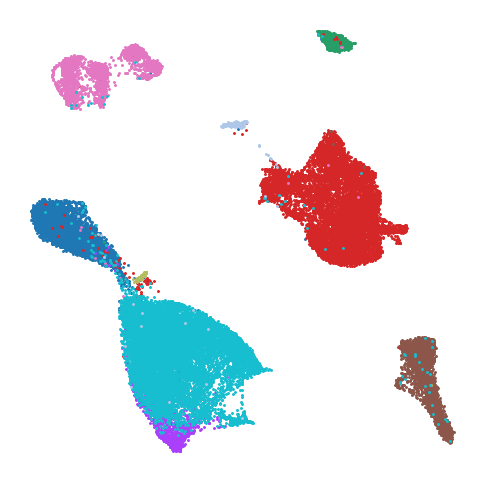

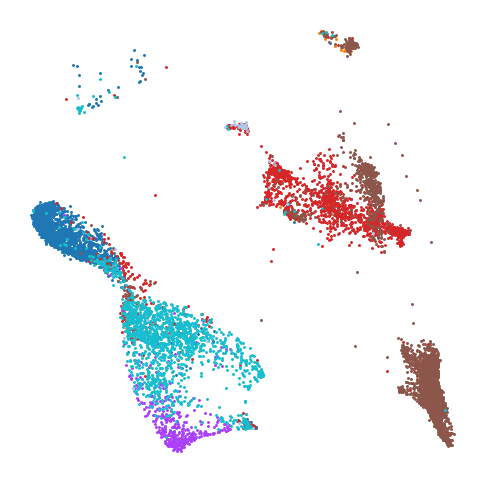

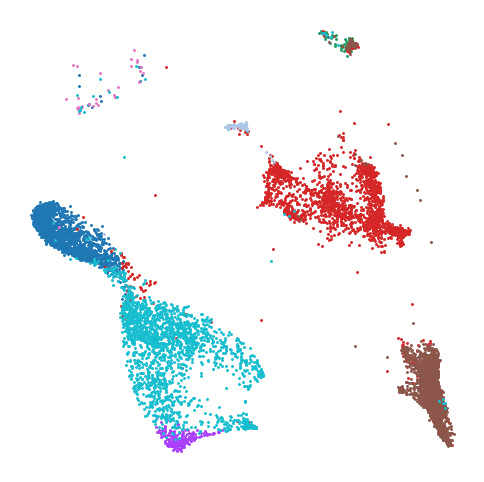

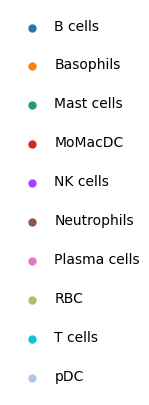

In [8]:
row = df.loc['{};all'.format(model),:]
df_res = get_res_obs(row)
df_res['sp'] = df_res['dataset_type'].map(
    {i: map_sp[row['sp_{}'.format(i)]] for i in 'ref,que'.split(',')})
display(df_res.head(2))

adata_umap = sc.AnnData(obs=df_res)
adata_umap.obsm['X_umap'] = df_res.loc[:,
                                       'UMAP1,UMAP2'.split(',')].to_numpy()
print(','.join(np.unique(adata_umap.obs['true_label'].unique())))
cell_type_color_map = get_color_map(
    "B cells,Basophils,Mast cells,MoMacDC,NK cells,Neutrophils,Plasma cells,RBC,T cells,pDC".split(',')
)
print(','.join(cell_type_color_map.keys()))


save_file_name = '{}{};{};umap;true_label;h.{}'.format(
    item,row['tag'],row['model'], fig_format)
plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'ref'],
          'true_label',
          cell_type_color_map,
          size=5,
          show_legend=show_legend,
          save_file_name=save_file_name,
          p_plot=p_plot_item
         )

save_file_name = '{}{};{};umap;true_label;m.{}'.format(
    item,row['tag'],row['model'], fig_format)
plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'que'],
          'true_label',
          cell_type_color_map,
          size=5,
          show_legend=show_legend,
          save_file_name=save_file_name,
          p_plot=p_plot_item)


save_file_name = '{}{};{};umap;pre_label;m.{}'.format(
    item,row['tag'],row['model'], fig_format)
plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'que'],
          'pre_label',
          cell_type_color_map,
          size=5,
          show_legend=show_legend,
          save_file_name=save_file_name,
          p_plot=p_plot_item)


# [legend]
_ = 'LCall'
ax = show_color_map(cell_type_color_map,marker='.',size=100,return_ax=True)
savefig(ax.figure,'legend;{};cell_type.png'.format(_),p_plot=p_plot_item)
savefig(ax.figure,'legend;{};cell_type.svg'.format(_),p_plot=p_plot_item)
savefig(ax.figure,'legend;{};cell_type.pdf'.format(_),p_plot=p_plot_item)

## LCDCs

,UMAP1,UMAP2,cell_type,dataset,is_right,max_prob,pre_label,true_label,dataset_type,sp
cell_name,,,,,,,,,,
bcAGGC;h1tl_1,-0.554495,2.34986,MonoDC,LC_h,NaN,NaN,NaN,MonoDC,ref,human
bcGDSJ;h1tl_1,4.152925,1.63767,DC2,LC_h,NaN,NaN,NaN,DC2,ref,human


DC1,DC2,DC3,MonoDC,pDC
DC1,DC2,DC3,MonoDC,pDC
[out][plot] LCDCs;Seurat;umap;true_label;hm.png 
	in /public/workspace/licanchengup/download/res_publish/plot/LC
[out][plot] LCDCs;Seurat;umap;pre_label;m.png 
	in /public/workspace/licanchengup/download/res_publish/plot/LC
[out][plot] legend;LCDCs;cell_type.png 
	in /public/workspace/licanchengup/download/res_publish/plot/LC
[out][plot] legend;LCDCs;cell_type.svg 
	in /public/workspace/licanchengup/download/res_publish/plot/LC
[out][plot] legend;LCDCs;cell_type.pdf 
	in /public/workspace/licanchengup/download/res_publish/plot/LC


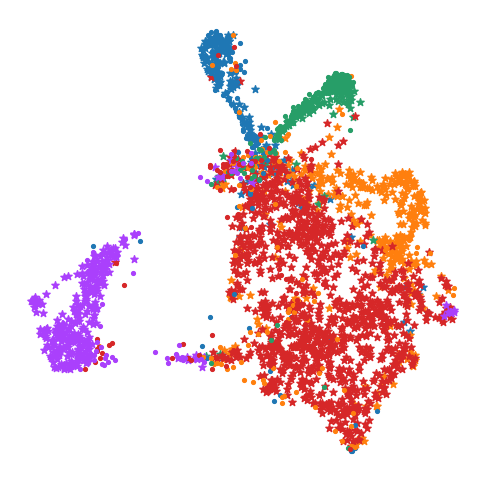

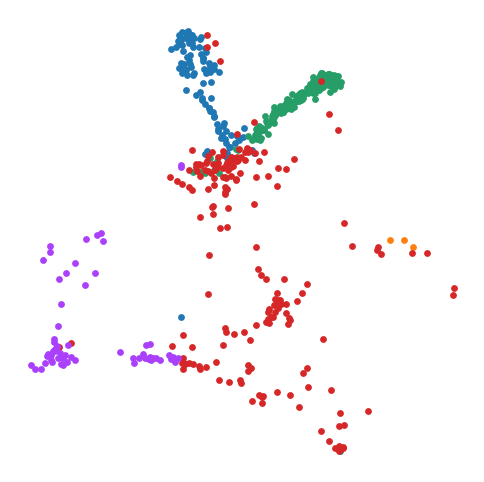

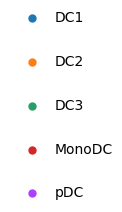

In [9]:
row = df.loc['{};DCs'.format(model),:]
df_res = get_res_obs(row)
df_res['sp'] = df_res['dataset_type'].map(
    {i: map_sp[row['sp_{}'.format(i)]] for i in 'ref,que'.split(',')})
display(df_res.head(2))


adata_umap = sc.AnnData(obs=df_res)
adata_umap.obsm['X_umap'] = df_res.loc[:,
                                       'UMAP1,UMAP2'.split(',')].to_numpy()
print(','.join(np.unique(adata_umap.obs['true_label'].unique())))
cell_type_color_map = get_color_map(
    "DC1,DC2,DC3,MonoDC,pDC".split(',')
)
print(','.join(cell_type_color_map.keys()))

# true_label;hm with marker
save_file_name = '{}{};{};umap;true_label;hm.{}'.format(
    item,row['tag'],row['model'], fig_format)
fig,ax = plt.subplots(1,1,figsize = (6,6))
plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'ref'],
          'true_label',
          cell_type_color_map,
          size=30,marker='*',
          show_legend=show_legend,ax=ax)
plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'que'],
          'true_label',
          cell_type_color_map,
          size=30,marker='.',
          show_legend=show_legend,ax=ax,
          save_file_name=save_file_name,
          p_plot=p_plot_item)

# pre_label;m with marker
save_file_name = '{}{};{};umap;pre_label;m.{}'.format(
    item,row['tag'],row['model'], fig_format)
plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'que'],
          'pre_label',
          cell_type_color_map,
          size=60,marker='.',
          show_legend=show_legend,
          save_file_name=save_file_name,
          p_plot=p_plot_item)

# [legend]
_ = 'LCDCs'
ax = show_color_map(cell_type_color_map,marker='.',size=100,return_ax=True)
savefig(ax.figure,'legend;{};cell_type.png'.format(_),p_plot=p_plot_item)
savefig(ax.figure,'legend;{};cell_type.svg'.format(_),p_plot=p_plot_item)
savefig(ax.figure,'legend;{};cell_type.pdf'.format(_),p_plot=p_plot_item)

## LCMono

,UMAP1,UMAP2,cell_type,dataset,is_right,max_prob,pre_label,true_label,dataset_type,sp
cell_name,,,,,,,,,,
bcALZN;h1tl_1,-1.785231,-2.101537,Mono1,LC_h,NaN,NaN,NaN,Mono1,ref,human
bcGSBJ;h1tl_1,-0.286649,-2.472176,Mono1,LC_h,NaN,NaN,NaN,Mono1,ref,human


Mono1,Mono2,Mono3
Mono1,Mono2,Mono3
[out][plot] LCMono;Seurat;umap;true_label;hm.png 
	in /public/workspace/licanchengup/download/res_publish/plot/LC
[out][plot] LCMono;Seurat;umap;pre_label;m.png 
	in /public/workspace/licanchengup/download/res_publish/plot/LC
[out][plot] legend;LCMono;cell_type.png 
	in /public/workspace/licanchengup/download/res_publish/plot/LC
[out][plot] legend;LCMono;cell_type.svg 
	in /public/workspace/licanchengup/download/res_publish/plot/LC
[out][plot] legend;LCMono;cell_type.pdf 
	in /public/workspace/licanchengup/download/res_publish/plot/LC


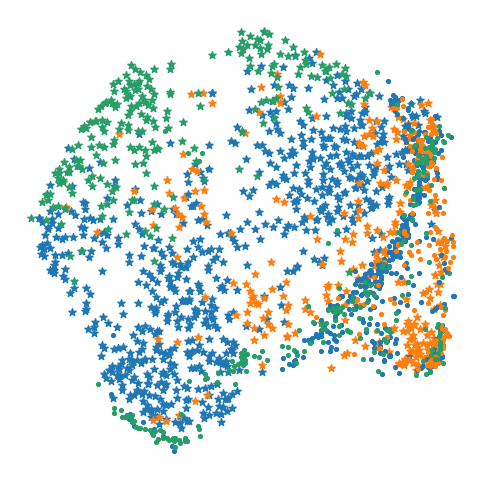

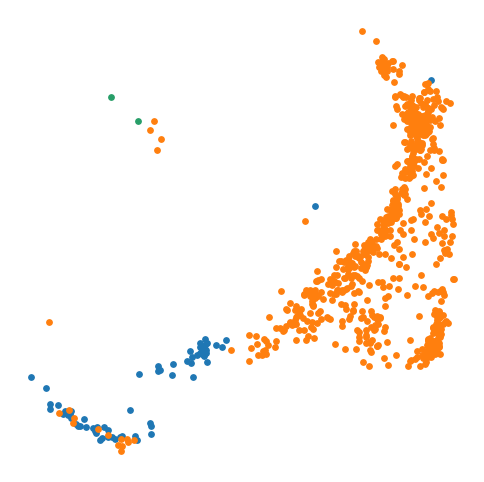

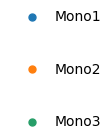

In [10]:
row = df.loc['{};Mono'.format(model),:]
df_res = get_res_obs(row)
df_res['sp'] = df_res['dataset_type'].map(
    {i: map_sp[row['sp_{}'.format(i)]] for i in 'ref,que'.split(',')})
display(df_res.head(2))


adata_umap = sc.AnnData(obs=df_res)
adata_umap.obsm['X_umap'] = df_res.loc[:,
                                       'UMAP1,UMAP2'.split(',')].to_numpy()
print(','.join(np.unique(adata_umap.obs['true_label'].unique())))
cell_type_color_map = get_color_map(
    "Mono1,Mono2,Mono3".split(',')
)
print(','.join(cell_type_color_map.keys()))

# true_label;hm with marker
save_file_name = '{}{};{};umap;true_label;hm.{}'.format(
    item,row['tag'],row['model'], fig_format)
fig,ax = plt.subplots(1,1,figsize = (6,6))
plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'ref'],
          'true_label',
          cell_type_color_map,
          size=30,marker='*',
          show_legend=show_legend,ax=ax)
plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'que'],
          'true_label',
          cell_type_color_map,
          size=30,marker='.',
          show_legend=show_legend,ax=ax,
          save_file_name=save_file_name,
          p_plot=p_plot_item)

# pre_label;m with marker
save_file_name = '{}{};{};umap;pre_label;m.{}'.format(
    item,row['tag'],row['model'], fig_format)
plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'que'],
          'pre_label',
          cell_type_color_map,
          size=60,marker='.',
          show_legend=show_legend,
          save_file_name=save_file_name,
          p_plot=p_plot_item)

# [legend]
_ = 'LCMono'
ax = show_color_map(cell_type_color_map,marker='.',size=100,return_ax=True)
savefig(ax.figure,'legend;{};cell_type.png'.format(_),p_plot=p_plot_item)
savefig(ax.figure,'legend;{};cell_type.svg'.format(_),p_plot=p_plot_item)
savefig(ax.figure,'legend;{};cell_type.pdf'.format(_),p_plot=p_plot_item)

## LCNeu

,UMAP1,UMAP2,cell_type,dataset,is_right,max_prob,pre_label,true_label,dataset_type,sp
cell_name,,,,,,,,,,
bcHRXV;h1tl_1,3.961460,2.581149,N5,LC_h,NaN,NaN,NaN,N5,ref,human
bcDZRV;h1tl_1,3.211878,-0.728005,N5,LC_h,NaN,NaN,NaN,N5,ref,human


N1,N2,N3,N4,N5,N6
N1,N2,N3,N4,N5,N6
[out][plot] LCNeu;Seurat;umap;true_label;hm.png 
	in /public/workspace/licanchengup/download/res_publish/plot/LC
[out][plot] LCNeu;Seurat;umap;pre_label;m.png 
	in /public/workspace/licanchengup/download/res_publish/plot/LC
[out][plot] legend;LCNeu;cell_type.png 
	in /public/workspace/licanchengup/download/res_publish/plot/LC
[out][plot] legend;LCNeu;cell_type.svg 
	in /public/workspace/licanchengup/download/res_publish/plot/LC
[out][plot] legend;LCNeu;cell_type.pdf 
	in /public/workspace/licanchengup/download/res_publish/plot/LC


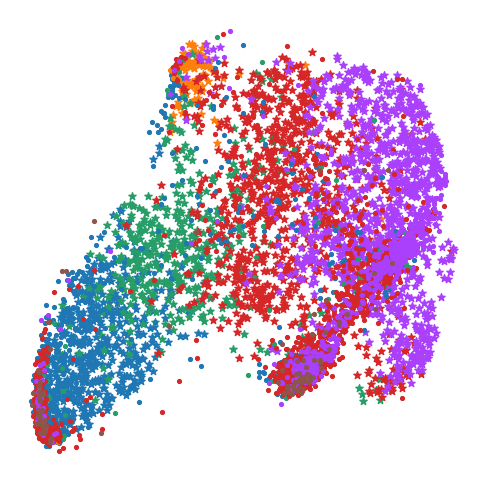

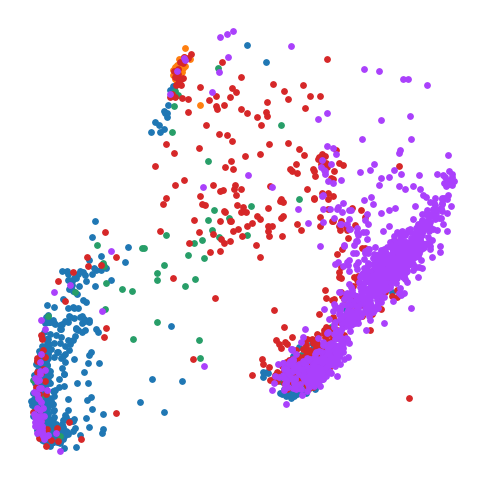

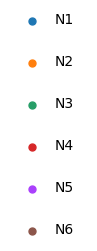

In [11]:
row = df.loc['{};Neu'.format(model),:]
df_res = get_res_obs(row)
df_res['sp'] = df_res['dataset_type'].map(
    {i: map_sp[row['sp_{}'.format(i)]] for i in 'ref,que'.split(',')})
display(df_res.head(2))


adata_umap = sc.AnnData(obs=df_res)
adata_umap.obsm['X_umap'] = df_res.loc[:,
                                       'UMAP1,UMAP2'.split(',')].to_numpy()
print(','.join(np.unique(adata_umap.obs['true_label'].unique())))
cell_type_color_map = get_color_map(
    "N1,N2,N3,N4,N5,N6".split(',')
)
print(','.join(cell_type_color_map.keys()))

# true_label;hm with marker
save_file_name = '{}{};{};umap;true_label;hm.{}'.format(
    item,row['tag'],row['model'], fig_format)
fig,ax = plt.subplots(1,1,figsize = (6,6))
plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'ref'],
          'true_label',
          cell_type_color_map,
          size=30,marker='*',
          show_legend=show_legend,ax=ax)
plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'que'],
          'true_label',
          cell_type_color_map,
          size=30,marker='.',
          show_legend=show_legend,ax=ax,
          save_file_name=save_file_name,
          p_plot=p_plot_item)

# pre_label;m with marker
save_file_name = '{}{};{};umap;pre_label;m.{}'.format(
    item,row['tag'],row['model'], fig_format)
plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'que'],
          'pre_label',
          cell_type_color_map,
          size=60,marker='.',
          show_legend=show_legend,
          save_file_name=save_file_name,
          p_plot=p_plot_item)

# [legend]
_ = 'LCNeu'
ax = show_color_map(cell_type_color_map,marker='.',size=100,return_ax=True)
savefig(ax.figure,'legend;{};cell_type.png'.format(_),p_plot=p_plot_item)
savefig(ax.figure,'legend;{};cell_type.svg'.format(_),p_plot=p_plot_item)
savefig(ax.figure,'legend;{};cell_type.pdf'.format(_),p_plot=p_plot_item)

In [12]:
print("\n[finish]\n".center(100,"-"))

---------------------------------------------
[finish]
---------------------------------------------
